# Подготовка данных

### Цель проекта:
Выбрать параметры датасета для модели, которая предсказывала бы результаты госэкзамена по математике.

### Задачи проекта:
- Провести первичную обработку данных;
- По необходимости преобразовать данные;
- Провести разведывательный анализ данных;
- Выявить параметры, сильно влияющие на успеваемость по математике;
- Создать датасет с выбранными параметры для модели;
- Составить отчёт по результатам работы.

### 1. Импортируем библиотеки необходимые для обработки данных

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 50) 

### 2. Функции для обработки данных

Оценка количества уникальных значений для каждого столбца в датасете:

In [2]:
def unic_data(dataset):
    for column in dataset:
        display(column)
        display(dataset.loc[:, column].unique())
        display(pd.DataFrame(dataset.loc[:, column].value_counts()))

Создание распределение оценки для каждого параметра с помощью Boxplot:  

In [3]:
def get_boxplot(column):
    if column == 'score':
        return 0 
    else:
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=column, y='score', 
                    data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:20])],
                   ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()

Распределение оценок по номинативным признакам, с помощью теста Стьюдента:

In [4]:
def get_stat_dif(column):
    marker = 0
    if column == 'score':
        return 0 
    else:
        cols = students.loc[:, column].value_counts().index[:20]
        combinations_all = list(combinations(cols, 2))
        for comb in combinations_all:
            if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                         students.loc[students.loc[:, column] == comb[1], 'score'],
                         nan_policy='omit').pvalue <= 0.1/len(combinations_all):
                print('Найдены статистически значимые различия для колонки', column)
                marker = 1
                break
    return marker

### 3. Импортируем данные необходимые для построения модели

Описание данных:

Данные содержат информацию для 395 учеников (395 строк) с 30 парамерами  (30 столбцов), описывающими условия жизни учащихся:

1. school — аббревиатура школы, в которой учится ученик;
2. sex — пол ученика ('F' - женский, 'M' - мужской);
3. age — возраст ученика (от 15 до 22);
4. address — тип адреса ученика ('U' - городской, 'R' - за городом);
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3);
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно);
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее);
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое);
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое);
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое);
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.);
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов);
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0);
16. schoolsup — дополнительная образовательная поддержка (yes или no);
17. famsup — семейная образовательная поддержка (yes или no);
18. paid — дополнительные платные занятия по математике (yes или no);
19. activities — дополнительные внеучебные занятия (yes или no);
20. nursery — посещал детский сад (yes или no);
21. studytime, granular - неизвестный параметр;
22. higher — хочет получить высшее образование (yes или no);
23. internet — наличие интернета дома (yes или no);
24. romantic — в романтических отношениях (yes или no);
25. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо);
26. freetime — свободное время после школы (от 1 - очень мало до 5 - очень много);
27. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много);
28. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо);
29. absences — количество пропущенных занятий;
30. score — баллы по госэкзамену по математике.

In [5]:
students = pd.read_csv('D:/Python/files/stud_math.csv')
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Выведем информацию о датасете:

In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В описании данных не сказано о столбце 'studytime, granular'.
Возможно стоит его удалить, т.к описать влияние неизветного параметра - невыполнимая задача.
Но оставим его неизменным и посмотрим корреляцию - ведь стереть неизвестный параметр всегда успеем.

Сохраним копию изначального датасета перед преобразованием:

In [7]:
data = students.copy()

Оценим количество уникальных значений для каждого столбца:

In [8]:
unic_data(students)

'school'

array(['GP', 'MS'], dtype=object)

,school
GP,349
MS,46


'sex'

array(['F', 'M'], dtype=object)

,sex
F,208
M,187


'age'

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


'address'

array(['U', nan, 'R'], dtype=object)

,address
U,295
R,83


'famsize'

array([nan, 'GT3', 'LE3'], dtype=object)

,famsize
GT3,261
LE3,107


'Pstatus'

array(['A', nan, 'T'], dtype=object)

,Pstatus
T,314
A,36


'Medu'

array([ 4.,  1.,  3.,  2., nan,  0.])

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


'Fedu'

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


'Mjob'

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


'Fjob'

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


'reason'

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

,reason
course,137
home,104
reputation,103
other,34


'guardian'

array(['mother', 'father', 'other', nan], dtype=object)

,guardian
mother,250
father,86
other,28


'traveltime'

array([ 2.,  1.,  3., nan,  4.])

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


'studytime'

array([ 2.,  3.,  1., nan,  4.])

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


'failures'

array([ 0.,  3., nan,  2.,  1.])

,failures
0.0,293
1.0,49
2.0,16
3.0,15


'schoolsup'

array(['yes', 'no', nan], dtype=object)

,schoolsup
no,335
yes,51


'famsup'

array(['no', 'yes', nan], dtype=object)

,famsup
yes,219
no,137


'paid'

array(['no', nan, 'yes'], dtype=object)

,paid
no,200
yes,155


'activities'

array(['no', 'yes', nan], dtype=object)

,activities
yes,195
no,186


'nursery'

array(['yes', 'no', nan], dtype=object)

,nursery
yes,300
no,79


'studytime, granular'

array([ -6.,  -9.,  -3.,  nan, -12.])

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


'higher'

array(['yes', nan, 'no'], dtype=object)

,higher
yes,356
no,19


'internet'

array([nan, 'yes', 'no'], dtype=object)

,internet
yes,305
no,56


'romantic'

array(['no', nan, 'yes'], dtype=object)

,romantic
no,240
yes,124


'famrel'

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


'freetime'

array([ 3.,  2.,  4.,  1.,  5., nan])

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


'goout'

array([ 4.,  3.,  2.,  1.,  5., nan])

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


'health'

array([ 3.,  5.,  1.,  2.,  4., nan])

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


'absences'

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


'score'

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


Расмотрим пропуски в столбцах и возможность их восстановить:
    
Пропуски не восстановить для следующих параметров:
- Адрес (address);
- Состав семьи (famsize);
- Состоянии семьи (Pstatus);
- Образование и работа родителей (Medu, Fedu, Mjob, Fjob);
- Опекунство (guardian);
- Время в пути до школы (traveltime);
- Время на учёбу помимо школы (studytime);
- Внеучебные неудачи (failures);
- Посещение детского сада (nursery);
- Желание о высшем обравзовании (higher);
- Семейные отношения (famrel);
- Свободное время (freetime);
- Время с друзьями (goout);
- Здоровье (health);
- Количество пропущенных занятий (absences);
- Баллы по математике (score).

Пропуски причины выбора школы (reason) можнозаполнить причиной "other":

In [9]:
students.reason = students.reason.astype(str).apply(lambda x: "other" if x.strip() == '' else "other" if x == 'nan'  else x)

Пропуски данных, для которых можем допустить, что их нет и заменить на соответствуещее значение ('no'):
- Дополнительной школьной (schoolsup) и семейной (famsup) образовательных поддержек;
- Дополнительные занятия (paid);
- Внеучебные занятия (activities);
- Наличие интернета (internet) 
- Наличие романтических отношений (romantic) 

In [10]:
for col in ['schoolsup', 
            'famsup', 
            'paid', 
            'activities',
            'internet', 
            'romantic']:
    students.loc[:, col] = students.loc[:, col].astype(str).apply(lambda x: 'no' if x.strip() == '' else 'no' if x == 'nan' else x)

Посмотрим на распределение признака для числовых переменных с помощью boxplot:

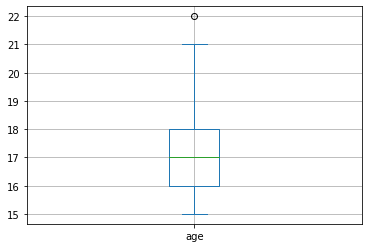

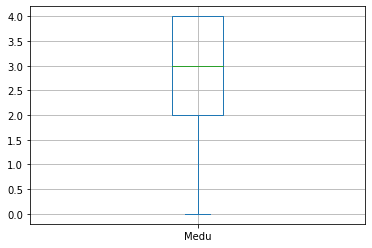

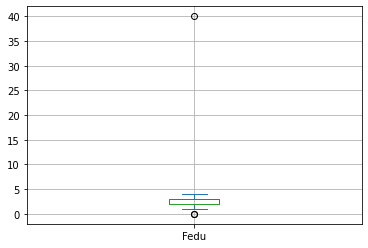

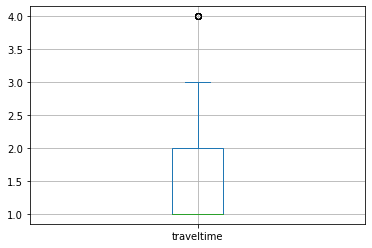

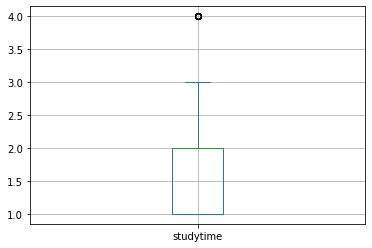

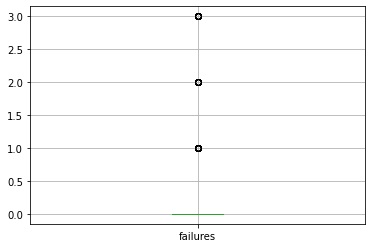

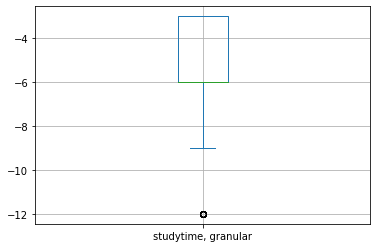

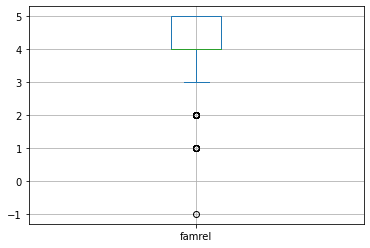

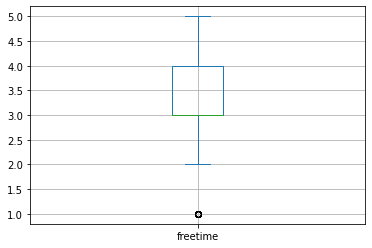

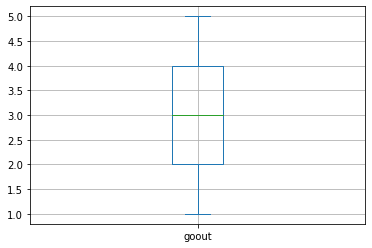

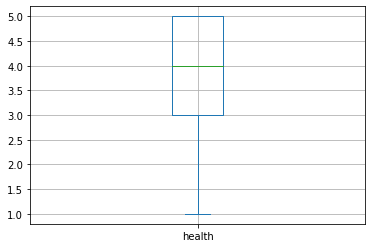

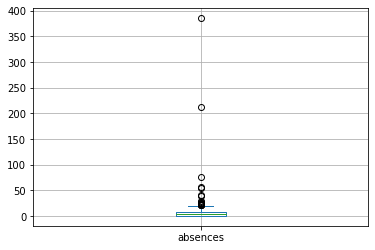

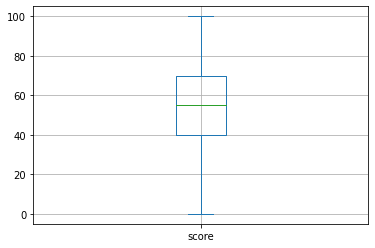

In [11]:
for col in ['age', 
            'Medu', 
            'Fedu', 
            'traveltime', 
            'studytime', 
            'failures', 
            'studytime, granular', 
            'famrel', 
            'freetime', 
            'goout', 
            'health', 
            'absences', 
            'score']:
        students.loc[:, col].plot(kind='box', grid=True)
        plt.show()

Рассмотрим выбросы:
- Возраст (age) 22 года - это не выброс. Оставим в датасете.
- Образование отца (Fedu) равно 40 - это явный выброс. Заменим на 'None':

In [12]:
students.loc[students['Fedu'] > 4,'Fedu'] = None

График boxplot количества внеучебных неудач (failures) объясняется модой значений равной 0.

Значения внеучебных неудач (failures) отличные от 0 - это не выбросы.

Cемейные отношения (famrel) равное -1 - это явный выброс. Заменим на 'None':

In [13]:
students.loc[students['famrel'] < 0,'famrel'] = None

График количества пропущенных занятий (absences) содержит явные выбросы с большим количеством прогулов. 

С этими людьми нужно работать отдельно:

In [14]:
truants = students[students.absences > 50]

В результате работы выделим отдельно этот датасет, убирая прогульщиков из основного датасета:

In [15]:
students = students[students.absences <= 50]

По распределению признака для числовых переменных заметно большое количество оценок 0 для студентов (37 значений). 

Создадим для них отдельный датасет:

In [16]:
bad_result = students[students.score == 0]

Возможно и стоит их рассмотреть отдельно, в результате работы выделим этот момент. 

Но из основного датасета их убирать не будем.

Также удалим данные с неизвестной оценкой:

In [17]:
students = students[students.score != None]

Проведем корреляционный анализ количественных переменных:

In [18]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.163290,-0.157332,0.083966,-0.002226,0.199485,0.002226,0.053338,0.026925,0.119978,-0.074452,0.189549,-0.148292
Medu,-0.163290,1.000000,0.636150,-0.188231,0.066396,-0.236228,-0.066396,-0.033749,0.014033,0.059334,-0.056457,0.109393,0.206832
Fedu,-0.157332,0.636150,1.000000,-0.153195,-0.007967,-0.267364,0.007967,-0.043031,-0.027514,0.039700,0.023316,0.047903,0.113629
traveltime,0.083966,-0.188231,-0.153195,1.000000,-0.107163,0.080485,0.107163,-0.034883,-0.010919,0.041757,-0.012026,-0.014119,-0.074557
studytime,-0.002226,0.066396,-0.007967,-0.107163,1.000000,-0.170010,-1.000000,0.021962,-0.126447,-0.047511,-0.084463,-0.083334,0.108723
failures,0.199485,-0.236228,-0.267364,0.080485,-0.170010,1.000000,0.170010,0.025891,0.096489,0.093712,0.072253,0.125687,-0.327062
"studytime, granular",0.002226,-0.066396,0.007967,0.107163,-1.000000,0.170010,1.000000,-0.021962,0.126447,0.047511,0.084463,0.083334,-0.108723
famrel,0.053338,-0.033749,-0.043031,-0.034883,0.021962,0.025891,-0.021962,1.000000,0.165051,0.074277,0.104647,-0.075895,0.057680
freetime,0.026925,0.014033,-0.027514,-0.010919,-0.126447,0.096489,0.126447,0.165051,1.000000,0.293223,0.053585,-0.013769,0.012534
goout,0.119978,0.059334,0.039700,0.041757,-0.047511,0.093712,0.047511,0.074277,0.293223,1.000000,-0.006266,0.107142,-0.135731


Самые не коррелирующие с оценкой данные: 
- Семейные отношения (famrel); 
- Свободное время (freetime);
- Здоровье (health);
- Прогулы (absences).

Самый заметный фактор влияющий на оценку: 
    
Обратная кореляция с количеством жизненных неудач - чем неудач больше, тем ниже оценка.

Посмотрим на распределение оценки (score) для каждого параметра с помощью boxplot:

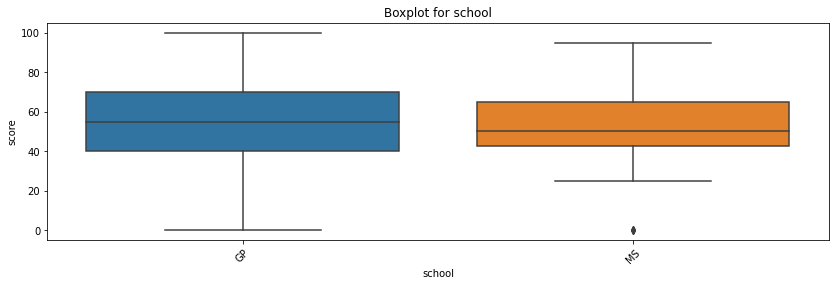

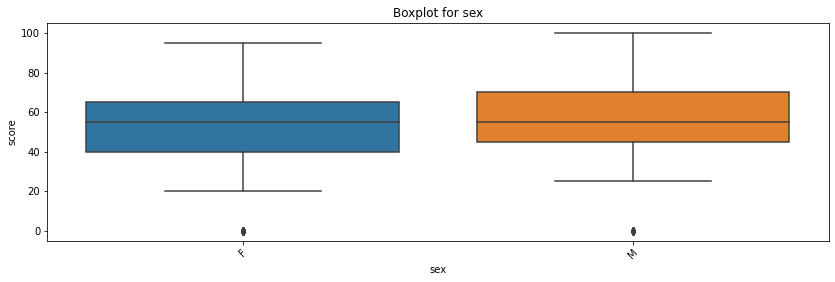

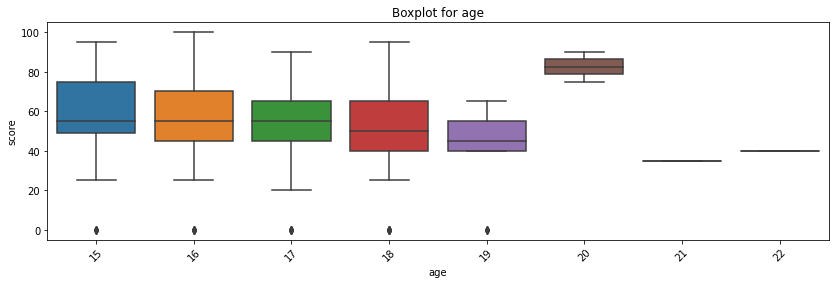

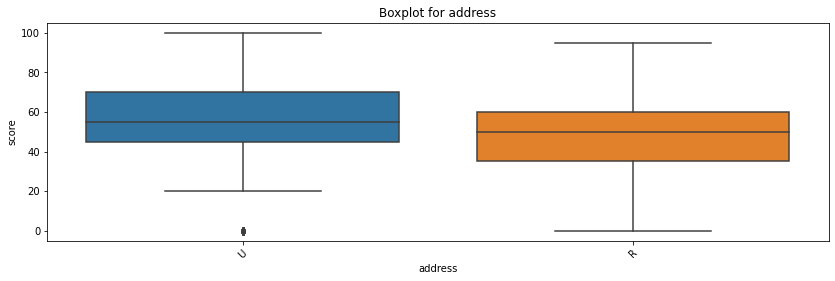

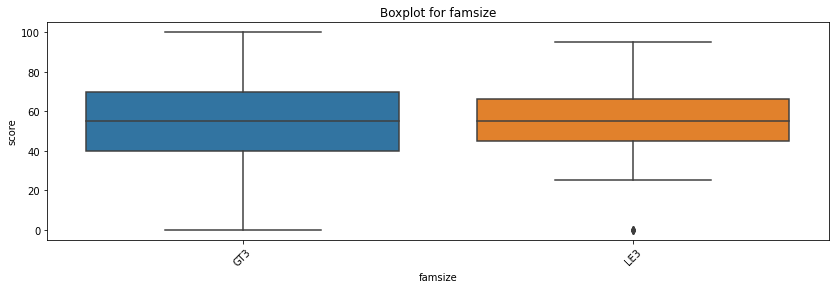

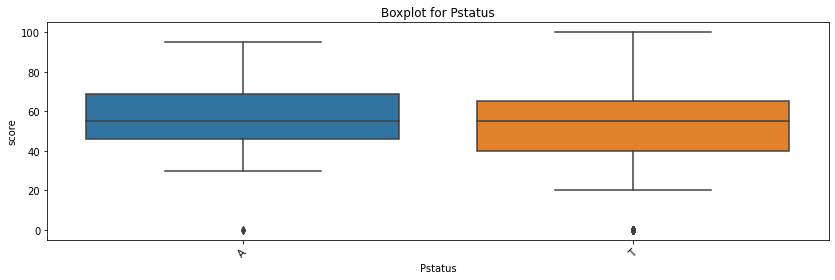

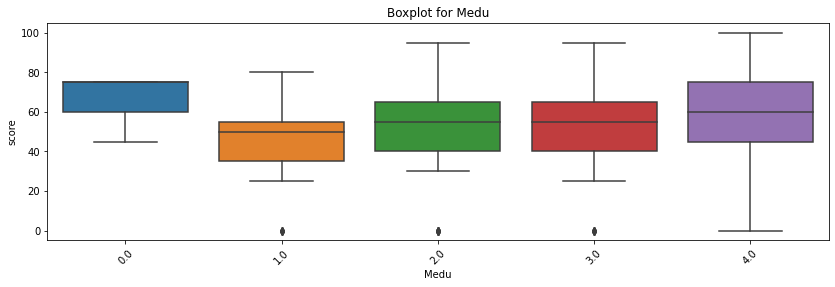

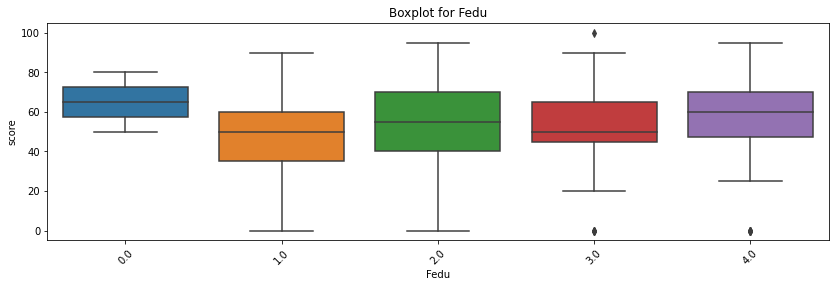

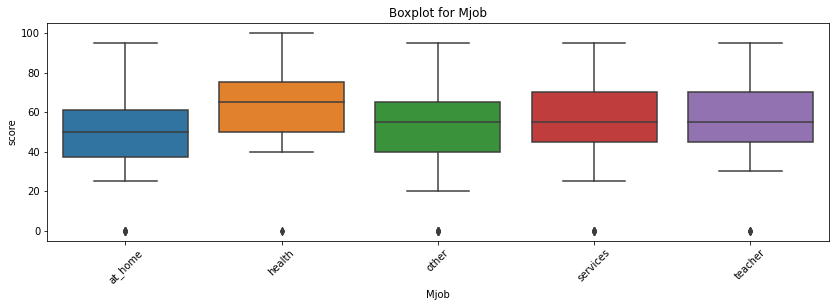

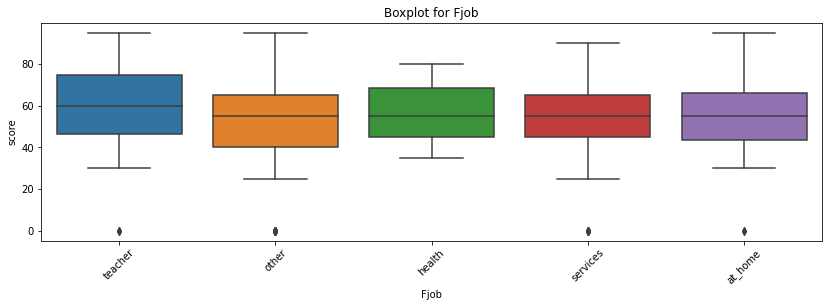

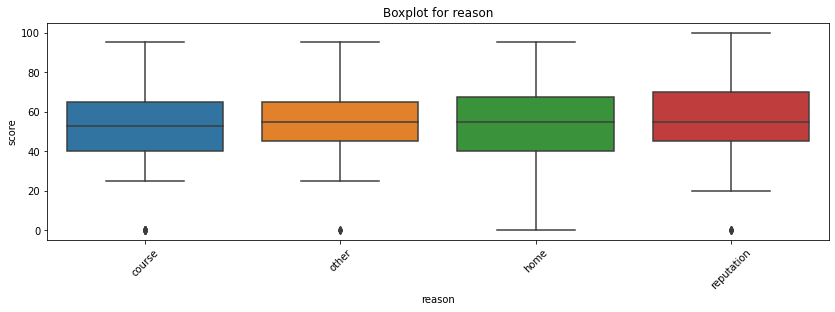

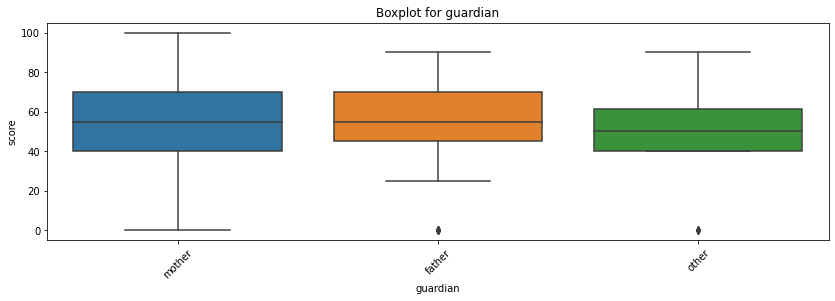

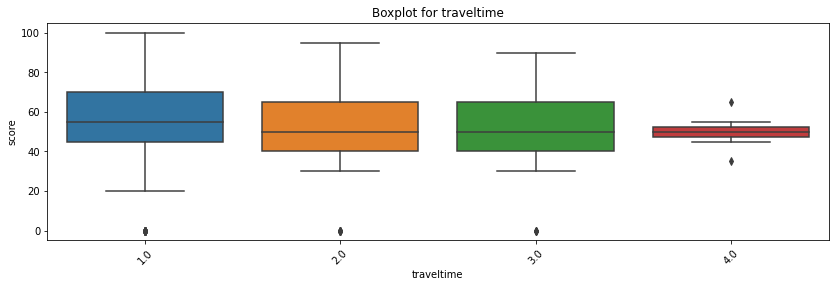

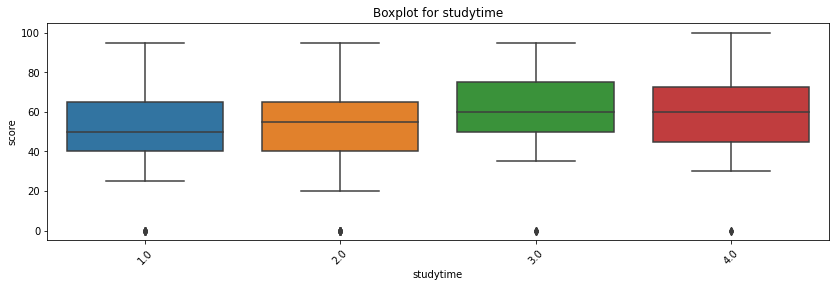

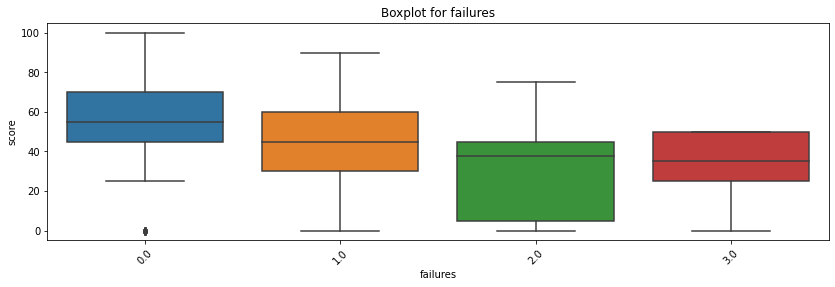

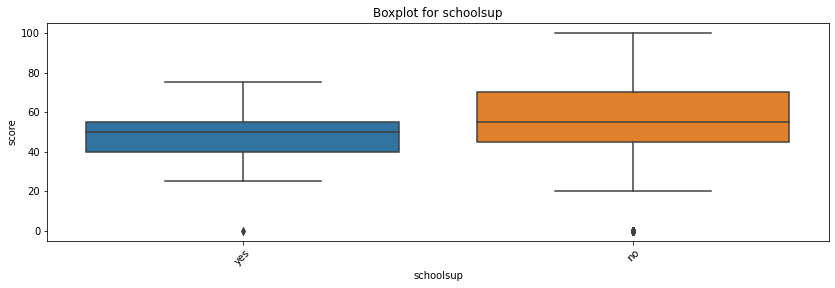

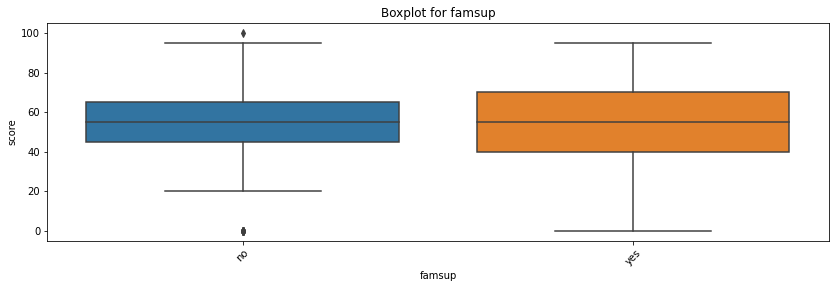

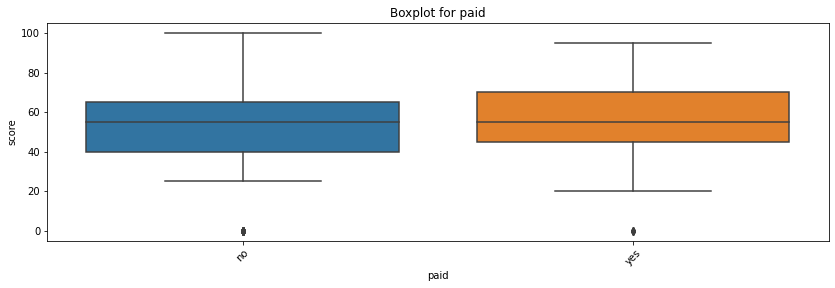

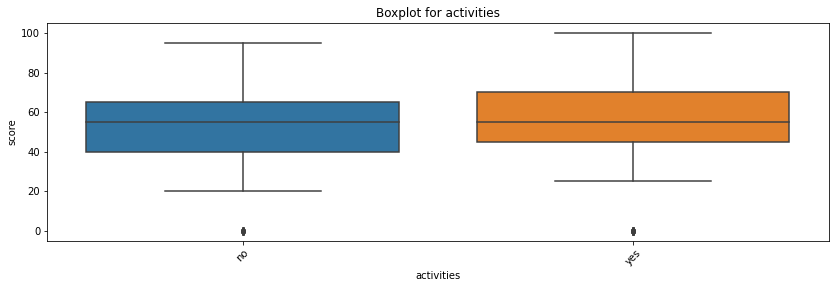

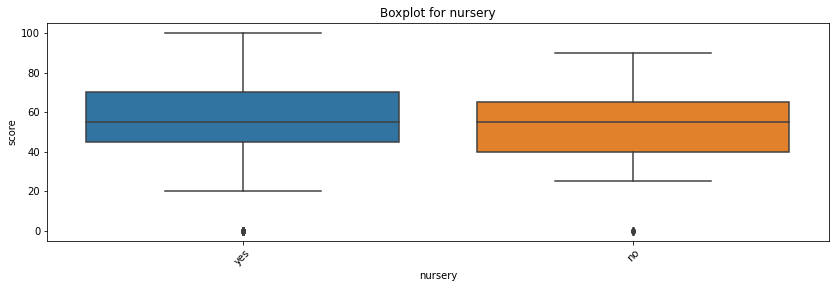

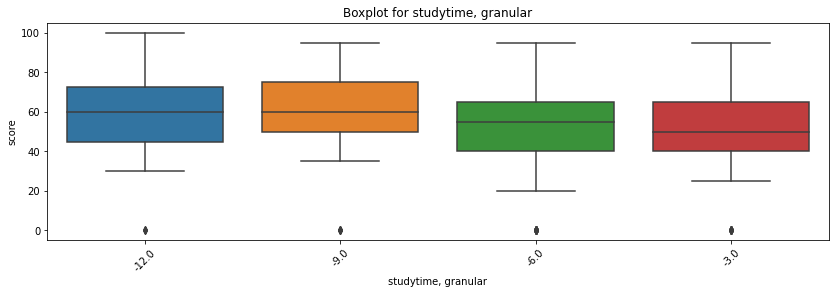

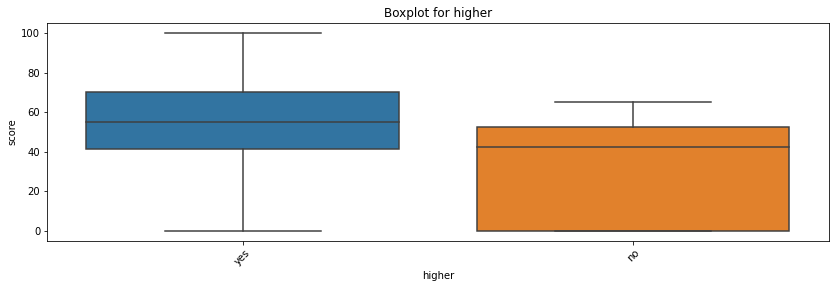

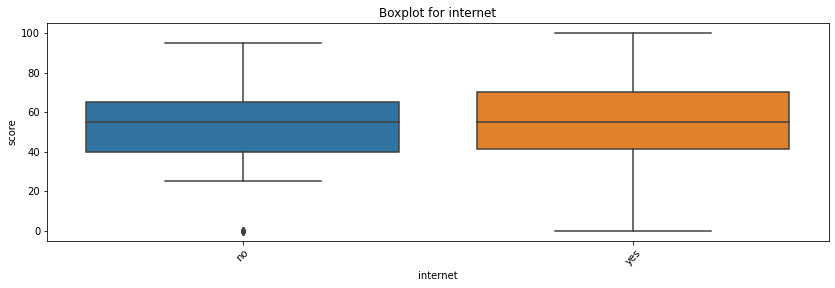

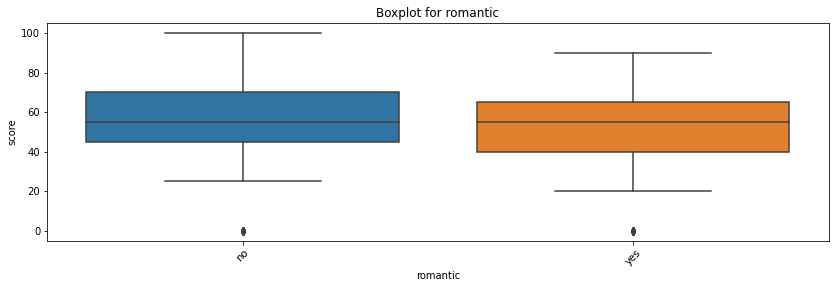

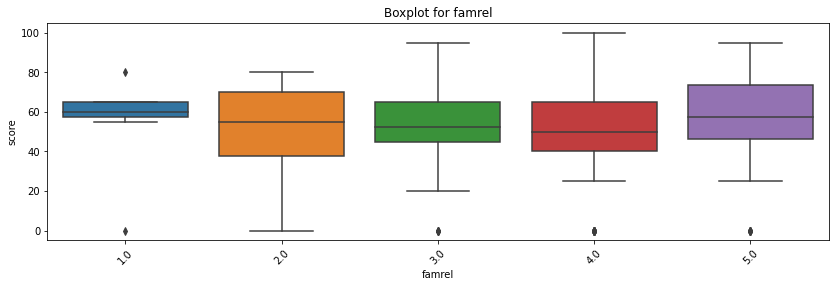

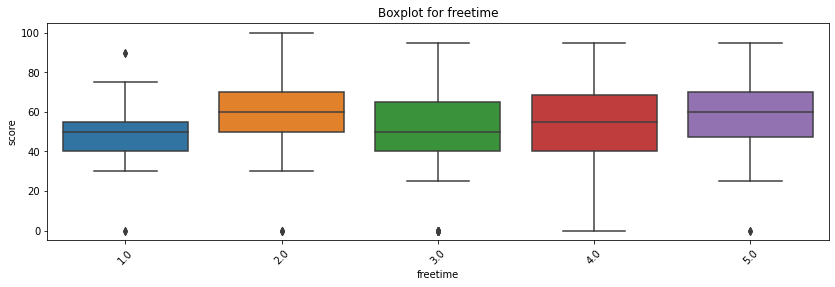

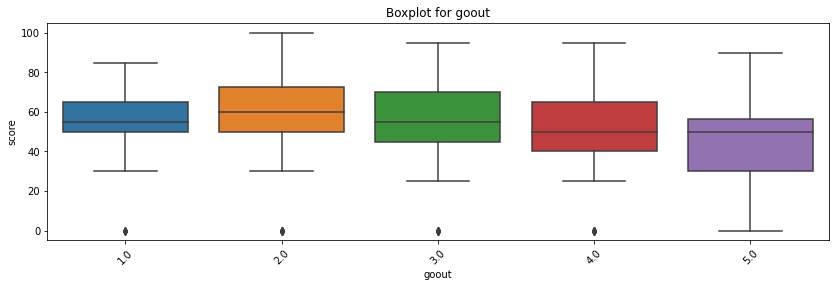

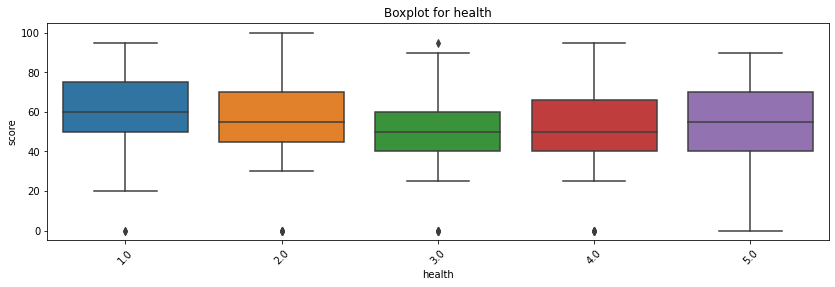

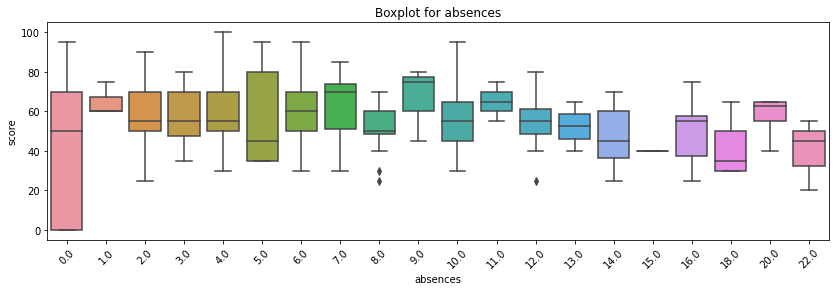

In [19]:
for col in students:
    get_boxplot(col)

Среди факторов не влияющих на оценку можно выделить следующие параметры:
- Работа отца (Fjob);
- Причина выбора школы (reason); 
- Внеучебные занятия (activities); 
- Посещение детского сада (nursery).

На графиках явно видно, что прогулы (absences) влияют на оценку, несмотря на корреляционный анализ

Большое количество прогулов сильно снижает среднюю оценку.

Создадим датасет модели и запишем в него оценку (score):

In [20]:
students_model = pd.DataFrame({})
students_model['score'] = students['score']

Проанализируем переменные которые влияют на итоговую оценку (score):

In [21]:
for col in students:
    check = get_stat_dif(col)
    if check == 1:
        students_model.loc[:, [col]] = students.loc[:, [col]]

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


В модель запишем переменные которые влияют на оценку (score):
Проверим, отличаются ли данные для первоначального датасета и преобразованного:

In [22]:
data_check = data[data.score != None]
for col in data_check:
    check = get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


Так мы убедимся, что не потеряли ни один важный параметр из-за преобразования данных.

Как видим выбранные параметры для преобразованного датасета не отличаются от первоначального.

Осмотрим полученные данные для модели:

In [23]:
students_model

,score,sex,address,Medu,Mjob,failures,schoolsup,paid,higher,romantic,goout,absences
0,30.0,F,U,4.0,at_home,0.0,yes,no,yes,no,4.0,6.0
1,30.0,F,U,1.0,at_home,0.0,no,no,yes,no,3.0,4.0
2,50.0,F,U,1.0,at_home,3.0,yes,no,yes,no,2.0,10.0
3,75.0,F,U,4.0,health,0.0,no,yes,yes,yes,2.0,2.0
4,50.0,F,U,3.0,other,0.0,no,yes,yes,no,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,F,U,1.0,other,1.0,no,no,yes,no,1.0,0.0
391,80.0,M,U,3.0,services,0.0,no,no,yes,no,5.0,3.0
392,35.0,M,R,1.0,other,3.0,no,no,NaN,no,3.0,3.0
393,50.0,M,R,3.0,services,0.0,no,no,yes,no,1.0,0.0


Результаты работы:
1. Преобразованы данные, пропущеные данные заменены, сохранен не преобразованный датасет (data);
2. Устранены выбросы, также из датасета (students) убраны прогульщики (больше 50 прогулов) и сохранены в отдельный датасет (truants);
3. Стоит обратит внимание на большое количество нулевых результатов. Из датасета (students) они не были убраны, но создан отдельный датасет (bad_result);
4. Выбраны параметры, сильно влияющие на успеваемость по математике;
5. Выбранные параметры для преобразованного датасета (students) не отличаются от первоначального (data).
6. Создан датасет с выбранными параметрами для модели (students_model).